In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
%matplotlib inline

# Code that will generate a first pass guess of noisy sine wave data based on 
# RMS, and then utilize that first pass and the original data to optimize the true non linear fit

In [12]:
smoothdata = pd.read_csv('C:/Users/jgratsch/Python/Maria_iphone_smoothslow_b2.csv', sep = ',', header = 1)
smoothdata = smoothdata[['timestamp(ms)', 'leftEyeX(3DR)', 'rightEyeX(3DR)']]
smoothdata['LEX'] = smoothdata['leftEyeX(3DR)'] * 1000
smoothdata['REX'] = smoothdata['rightEyeX(3DR)'] * 1000
smoothdata['timestamp(ms)'] = smoothdata['timestamp(ms)'] /1000
calibrationdata = smoothdata[smoothdata['timestamp(ms)'] < 10]
smoothdata = smoothdata[smoothdata['timestamp(ms)'] > 10]
smoothdata = smoothdata.reset_index(drop=True)
t = smoothdata['timestamp(ms)']

In [3]:
# shows stats for the data
smoothdata.describe()

,timestamp(ms),leftEyeX(3DR),rightEyeX(3DR),LEX,REX
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000
mean,30.000002,0.031394,-0.030005,31.393718,-30.004815
std,11.561439,0.000662,0.000852,0.661963,0.852247
min,10.000001,0.029867,-0.031698,29.867000,-31.698000
25%,20.000002,0.030822,-0.030778,30.822000,-30.778000
50%,30.000002,0.031443,-0.029913,31.443000,-29.913000
75%,40.000003,0.031948,-0.029291,31.948000,-29.291000
max,50.000004,0.032826,-0.028322,32.826000,-28.322000


In [14]:
# estimate parameters for sin wave
est_mean_lex = np.mean(smoothdata['LEX'])
est_std_lex = 3 * np.std(smoothdata['LEX'])/(2**0.5)
est_phase_lex = 0

est_mean_rex = np.mean(smoothdata['REX'])
est_std_rex = 3 * np.std(smoothdata['REX'])/(2**0.5)
est_phase_rex = 0

# generate first pass based on parameters
lex_firstpass = -est_std_lex * np.sin((t+est_phase_lex)*(2*np.pi)/10) + est_mean_lex
rex_firstpass = -est_std_rex * np.sin((t+est_phase_rex)*(2*np.pi)/10) + est_mean_rex

In [16]:
# define the function we want to minimize
optimize_func_lex = lambda x: -x[0]*np.sin((t+x[1])*(2*np.pi)/10) + x[2] - smoothdata['LEX']
opt_std_lex, opt_phase_lex, opt_mean_lex = leastsq(optimize_func_lex, [est_std_lex, est_phase_lex, est_mean_lex])[0]

optimize_func_rex = lambda x: -x[0]*np.sin((t+x[1])*(2*np.pi)/10) + x[2] - smoothdata['REX']
opt_std_rex, opt_phase_rex, opt_mean_rex = leastsq(optimize_func_rex, [est_std_rex, est_phase_rex, est_mean_rex])[0]

In [17]:
# generate optimized fit of sine wave
fit_lex = -opt_std_lex * np.sin((t+opt_phase_lex)*(2*np.pi)/10) + opt_mean_lex
fit_rex = -opt_std_rex * np.sin((t+opt_phase_rex)*(2*np.pi)/10) + opt_mean_rex

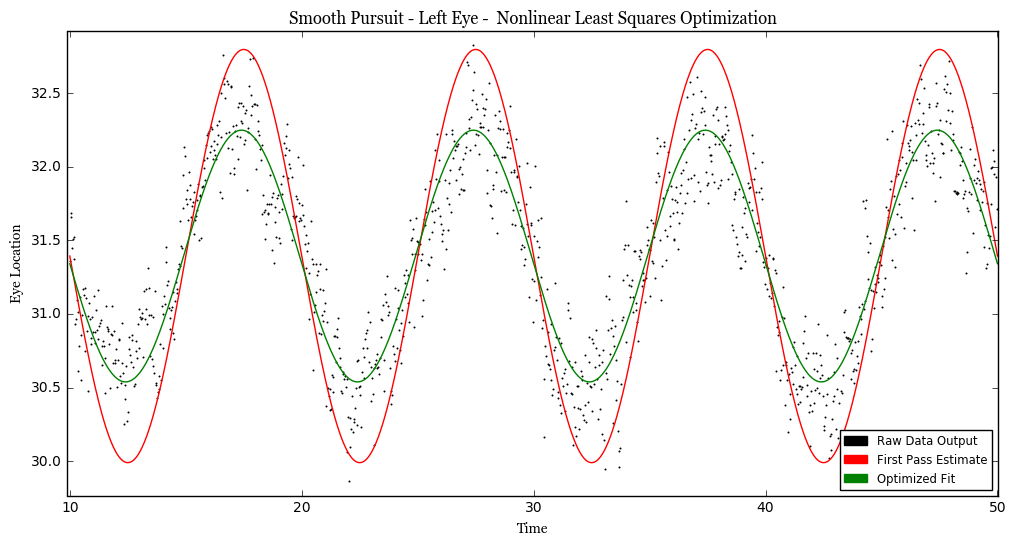

In [22]:
#build visual for left eye
csfont = {'fontname':'Georgia'}
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(111)

ax1.plot(t, smoothdata['LEX'], marker = 'o',linestyle = '',  markersize = 0.9, color = 'black' )
ax1.plot(t, lex_firstpass, linestyle = '-', color = 'red')
ax1.plot(t, fit_lex, linestyle = '-', color = 'green')
#ax1.plot(t, lex_stim, linestyle = '-', color = 'dodgerblue')

true = mpatches.Patch(color = 'black', label = 'Raw Data Output')
first = mpatches.Patch(color = 'red', label = 'First Pass Estimate')
opt = mpatches.Patch(color = 'green', label = 'Optimized Fit')

ax1.legend(handles = [true, first, opt], loc = 4, fontsize = 'small')

plt.xlim(np.min(t)-0.1, np.max(t))
plt.ylim(np.min(smoothdata['LEX'])-0.1, np.max(smoothdata['LEX'])+0.1)
plt.xlabel('Time', **csfont)
plt.ylabel('Eye Location', **csfont)
plt.title('Smooth Pursuit - Left Eye -  Nonlinear Least Squares Optimization', **csfont)

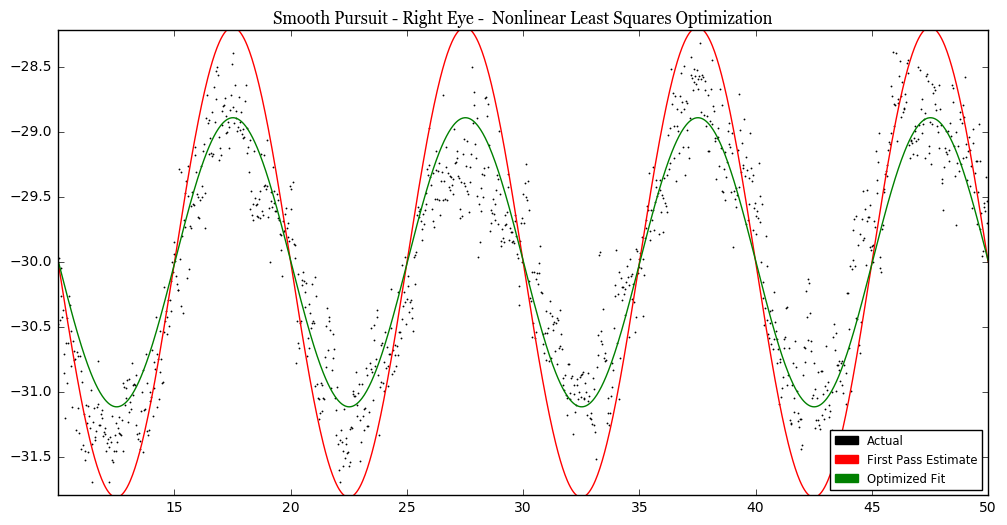

In [23]:
# build visual for right eye
csfont = {'fontname':'Georgia'}
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(111)

ax1.plot(t, smoothdata['REX'], marker = 'o',linestyle = '',  markersize = 0.8, color = 'black' )
ax1.plot(t, rex_firstpass, linestyle = '-', color = 'red')
ax1.plot(t, fit_rex, linestyle = '-', color = 'green')

true = mpatches.Patch(color = 'black', label = 'Actual')
first = mpatches.Patch(color = 'red', label = 'First Pass Estimate')
opt = mpatches.Patch(color = 'green', label = 'Optimized Fit')

ax1.legend(handles = [true,first,opt], loc = 4, fontsize = 'small')

plt.xlim(np.min(t), np.max(t))
plt.ylim(np.min(smoothdata['REX'])-0.1, np.max(smoothdata['REX'])+0.1)
plt.title('Smooth Pursuit - Right Eye -  Nonlinear Least Squares Optimization', **csfont)